### Belirlediğimiz kesit ile karşılaştırma yaparak eşleme işlemidir

In [4]:
import cv2
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline

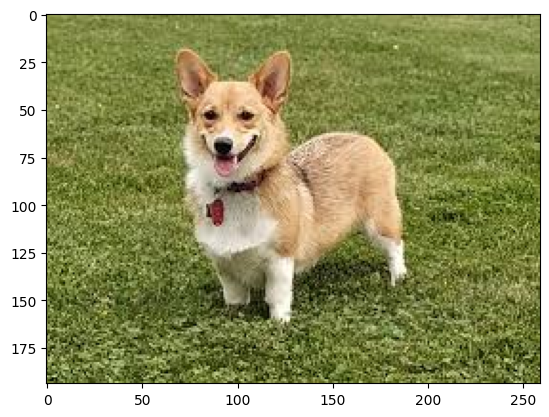

In [5]:
full=cv2.imread('input/dog.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [6]:
full.shape

(194, 259, 3)

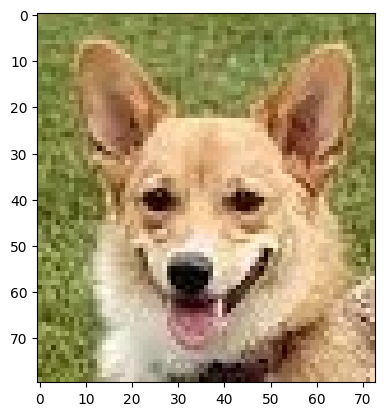

In [7]:
face=cv2.imread('input/dog_face.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [8]:
face.shape

(80, 73, 3)

In [10]:
height,weight,channels=face.shape

## eval fonksiyonu knedisine verilen karakter dizisini değerlendirir ve bize sonuç döndürür

In [12]:
my_method=eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face,my_method)

* eval('cv2.TM_CCOEFF'):<br>
    eval() fonksiyonu, bir metin dizesini Python koduna dönüştürmeye yarar. Yani 'cv2.TM_CCOEFF' dizesi, bir Python ifadesi olarak yorumlanır.<br>
    'cv2.TM_CCOEFF', OpenCV kütüphanesinde bulunan bir sabit olan cv2.TM_CCOEFF'i ifade eder. Bu, template eşleştirmesi için bir yöntemdir.<br>
    Bu ifade eval() ile işlenerek, string olarak temsil edilen cv2.TM_CCOEFF sabiti, gerçek cv2.TM_CCOEFF sabitiyle eşleştirilir ve my_method değişkenine atanır.<br><br>
* res = cv2.matchTemplate(full, face, my_method):<br>
    cv2.matchTemplate() işlevi, bir şablonun bir görüntü içindeki eşleşmelerini arar.<br>
    full değişkeni, arama yapılacak tam görüntüyü (ana görüntüyü) temsil eder.<br>
    face değişkeni, tam görüntüde aranacak olan şablonu temsil eder.<br>
    my_method değişkeni, kullanılacak template eşleştirme yöntemini belirler. Yani, bu metodun cv2.TM_CCOEFF olması durumunda, çapraz korelasyon katsayısını kullanarak eşleşmeleri hesaplar.<br>
    Sonuç, res değişkenine atanır. Bu sonuç, tam görüntüdeki şablonun yerini ve benzerlik derecesini gösteren bir matristir.<br>

Bu kod parçası, template eşleştirmesi yapmak için kullanılan bir yöntemi kullanarak, bir resimde belirli bir modelin benzerliklerini arar. Template eşleştirmesi, görüntü işleme ve bilgisayarlı görü yetenekleri gerektiren birçok uygulama için önemlidir. Bu örnekte, yüz tespiti gibi bir işlem için kullanılabilir.

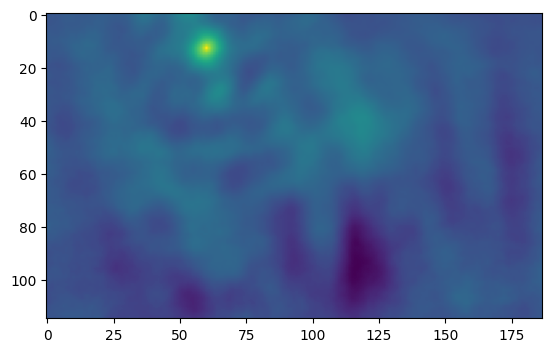

In [13]:
plt.imshow(res) # eşleme değerinin başladığı koordinat